<a href="https://colab.research.google.com/github/chloecasserly/Electrifying-Tractors-for-Farming-and-Electricity-Grid-Integration/blob/main/TractorOptimisationv1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# User Input for Optimisation --------------------------------------------------
# Scenario inputs (0 or 1)
pv = 1
bess_R = 1
bess_W = 0
capex = 1
fcas = 0

# Prints name to output graphs
name = 'PV'

In [ ]:
from google.colab import files;
uploaded = files.upload()

"""
Upload the following files for the code to run:

Currently Used
 - 'Model RF Tractor Use.xlsx'
 - 'Model NEM Spot Price Full.xlsx'
 - 'Model TOU Cost ActewAGL 2025.xlsx'
 - 'Model TOU Cost Essential Energy 2025.xlsx'
 - 'Model PV Generation.xlsx'
 - 'Model Electricity Profile V1.xlsx'

Link to all model files
https://anu365.sharepoint.com/:f:/r/sites/2025ENGN4300CapstoneProjectRepository/Project%20Documents/06.%20Deliverables%20and%20Models/Models%20and%20Data/FINAL%20DATA%20FOR%20IMPLEMENTATION?csf=1&web=1&e=79O5do
"""

Saving Model TOU Cost Essential Energy 2025.xlsx to Model TOU Cost Essential Energy 2025.xlsx
Saving Model Electricity Profile V1.xlsx to Model Electricity Profile V1.xlsx
Saving Model PV Generation.xlsx to Model PV Generation.xlsx
Saving Model TOU Cost ActewAGL 2025.xlsx to Model TOU Cost ActewAGL 2025.xlsx
Saving Model NEM Spot Price Full.xlsx to Model NEM Spot Price Full.xlsx
Saving Model RF Tractor Use.xlsx to Model RF Tractor Use.xlsx


"\nUpload the following files for the code to run:\n\nCurrently Used\n - 'Model RF Tractor Use.xlsx'\n - 'Model NEM Spot Price Full.xlsx'\n - 'Model TOU Cost ActewAGL 2025.xlsx'\n - 'Model TOU Cost Essential Energy 2025.xlsx'\n - 'Model PV Generation.xlsx'\n - 'Model Electricity Profile V1.xlsx'\n\nLink to all model files\nhttps://anu365.sharepoint.com/:f:/r/sites/2025ENGN4300CapstoneProjectRepository/Project%20Documents/06.%20Deliverables%20and%20Models/Models%20and%20Data/FINAL%20DATA%20FOR%20IMPLEMENTATION?csf=1&web=1&e=79O5do\n"

In [ ]:
import pandas as pd
from pyomo.environ import *
!apt-get install -y -qq glpk-utils

# Data Import and Processing ---------------------------------------------------

# Load excel files

# Tractor Use (Options A -> D)
# Slashing and Undervine Spraying can be done in 1 day or split over 2 days
# 1 day Slashing and Undervine Spraying
excel_tractor_use_A = pd.read_excel("Model RF Tractor Use.xlsx", sheet_name =
                                    'Tractor Load A', usecols = 'I', header=1)
# 1 day Slashing and 2 days Undervine Spraying
excel_tractor_use_B = pd.read_excel("Model RF Tractor Use.xlsx", sheet_name =
                                    'Tractor Load B', usecols = 'I', header=1)
# 2 days Slashing and 1 day Undervine Spraying
excel_tractor_use_C = pd.read_excel("Model RF Tractor Use.xlsx", sheet_name =
                                    'Tractor Load C', usecols = 'I', header=1)
# 2 days Slashing and 2 days Undervine Spraying
excel_tractor_use_D = pd.read_excel("Model RF Tractor Use.xlsx", sheet_name =
                                    'Tractor Load D', usecols = 'I', header=1)
# Note: header=1 is used as document has two header rows

# Wholesale Electricity Prices (SPOT Prices from NEM)
excel_spot_price = pd.read_excel('Model NEM Spot Price Full.xlsx', usecols='I')

excel_ele_profile = pd.read_excel('Model Electricity Profile V1.xlsx', sheet_name='Total Profile' ,usecols='I')

excel_PV = pd.read_excel('Model PV Generation.xlsx', usecols='I')

# ActewAGL Residential Electricity Costs
# ActewAGL Plan 1 (Home_Plan_Price_Per_kWh)
excel_R_A1 = pd.read_excel('Model TOU Cost ActewAGL 2025.xlsx', usecols='C')
# ActewAGL Energy Plan 2 (Home_Time_Of_Use_Plan_Price_Per_kWh)
excel_R_A2 = pd.read_excel('Model TOU Cost ActewAGL 2025.xlsx', usecols='D')
# ActewAGL Plan 3 (Home_Daytime_Economy_Plan_Price_Per_kWh)
excel_R_A3 = pd.read_excel('Model TOU Cost ActewAGL 2025.xlsx', usecols='E')

# Essential Energy Residential Electricity Costs
# Essential Energy Plan 1 (Residential_Time_Of_Use_Opt_In_Demand_Plan_Price_Per_kWh)
excel_R_E1 = pd.read_excel('Model TOU Cost Essential Energy 2025.xlsx', usecols='C')
# Essential Energy Energy Plan 2 (Residential_Time_Of_Use_Sun_Soaker_Plan_Price_Per_kWh)
excel_R_E2 = pd.read_excel('Model TOU Cost Essential Energy 2025.xlsx', usecols='D')


# Create index of no. data points for set (doesnt need to be based off 'Tractor_Use'
# but all data sets in the optimisation are the same length of data
# points)
data_length = list(range(len(excel_tractor_use_A)))

# CODE CHECKS
print(data_length)
print(excel_tractor_use_A.head())


Selecting previously unselected package libsuitesparseconfig5:amd64.
(Reading database ... 126284 files and directories currently installed.)
Preparing to unpack .../libsuitesparseconfig5_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libsuitesparseconfig5:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libamd2:amd64.
Preparing to unpack .../libamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libcolamd2:amd64.
Preparing to unpack .../libcolamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libcolamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libglpk40:amd64.
Preparing to unpack .../libglpk40_5.0-1_amd64.deb ...
Unpacking libglpk40:amd64 (5.0-1) ...
Selecting previously unselected package glpk-utils.
Preparing to unpack .../glpk-utils_5.0-1_amd64.deb ...
Unpacking glpk-utils (5.0-1) ...
Setting up libsuitesparseconfig5:amd64 (1:5.10.1+dfsg-4b

Current Optimisation Status Notes:
1. SOC has its own indices to use to calculate based on previous and next values - can see in 0.0
2. Tractor and BESS efficiency data has not been correctly filled (only placeholder)
3. OandM for tractor is also a placeholder
4. CRF has not been coded (this shouldnt be too hard)
5. Grid Capacity needs to be determined possily using the input of a postcode
8. Should write out various scenarios in notes with flags for BESS etc
9. Trailling BESS, PV and wholesale flags



In [ ]:
"""
Structured Optimisation following 'Updated_Optimisation_5.4'
"""
# 0.0 Optimisation Set Up ------------------------------------------------------

# Create Pyomo model "modelv1"
modelv1 = ConcreteModel()
# Make index for days
modelv1.T = Set(initialize=data_length)

# Make index for SOC Constraints that use [t-1] and [t+1]
T_SOC_indices = data_length[:-1]  # all t where t+1 is valid
modelv1.T_SOC = Set(initialize=T_SOC_indices)

In [ ]:
"""
Structured Optimisation following 'Updated_Optimisation_5.4'
"""
from pyomo.environ import inequality
from pyomo.environ import *

# Fixed Variables --------------------------------------------------------------
eff_in = 0.9
eff_out = 0.9
CAPEX_tractor = 155711
OandM_tractor = 25000 # Unsure what this value is and where to find

if pv == 0: # OandM and Capex for PV is 0 when flag not indicated
  OandM_PV = 0
  CAPEX_PV = 0
else:
  OandM_PV = 44.198
  CAPEX_PV = 65623

if bess_W == 0 or bess_R == 0: # OandM and Capex for BESS is 0 when flag not indicated
  OandM_BESS = 0
  CAPEX_BESS = 0
else:
  OandM_BESS = 4.3274
  CAPEX_BESS = 29300

CRF = 0 # Can add later

# 1.0 Variables and Parameters -------------------------------------------------

# 1.1 Decision Variables (Decided by optimisation)
# Status: DONE
# Variables are non-negative and part of indexed set "modelv1.T"
# Fix variables based on flags
modelv1.grid_imp_W = Var(modelv1.T, domain=NonNegativeReals)
modelv1.grid_exp_W = Var(modelv1.T, domain=NonNegativeReals)
modelv1.grid_imp_R = Var(modelv1.T, domain=NonNegativeReals)

modelv1.BESS_in_W = Var(modelv1.T, domain=NonNegativeReals)
modelv1.BESS_out_W = Var(modelv1.T, domain=NonNegativeReals)
modelv1.BESS_in_R = Var(modelv1.T, domain=NonNegativeReals)
modelv1.BESS_out_R = Var(modelv1.T, domain=NonNegativeReals)

modelv1.tractor_in = Var(modelv1.T, domain=NonNegativeReals)
modelv1.tractor_out = Var(modelv1.T, domain=NonNegativeReals)

modelv1.PV_W = Var(modelv1.T, domain=NonNegativeReals)
modelv1.PV_R = Var(modelv1.T, domain=NonNegativeReals)

modelv1.farm = Var(modelv1.T, domain=NonNegativeReals)

modelv1.SOC_BESS_W = Var(modelv1.T, domain=NonNegativeReals)
modelv1.SOC_BESS_R = Var(modelv1.T, domain=NonNegativeReals)
modelv1.SOC_tractor = Var(modelv1.T, domain=NonNegativeReals)

#Added for import/export
modelv1.grid_mode = Var(modelv1.T, domain=Binary) # Import = 1, Export = 0


# 1.2 Model Parameters and Inputs (Should be assigned a value immediately from imported models or elsewhere
# Status: Partially finished - CRF identification
modelv1.PV_cap = Param(initialize=2) # kW (KWp) (doc ref - Model PV Generation)

modelv1.BESS_cap_W = Param(initialize=67.5) # kWh (doc ref - Research Battery BESS Fendt tractor chosen)
modelv1.BESS_cap_R = Param(initialize=67.5) # kWh

modelv1.tractor_cap = Param(initialize=100) #kWh (doc ref - Research Tractor and Battery)

modelv1.BESS_max_W = Param(initialize=105) # kWh (doc ref - Research Battery BESS)
modelv1.BESS_max_R = Param(initialize=75) # kWh

modelv1.tractor_max = Param(initialize=14.28) # kWh (doc ref - Research Battery BESS Fendt tractor chosen)

modelv1.grid_max = Param(initialize=15) # Rohan is collating better data for this

modelv1.tractor_load = Param(modelv1.T, initialize=excel_tractor_use_A) # Tractor Usage Profile A (Can choose A-D)
modelv1.farm_load = Param(modelv1.T, initialize=excel_ele_profile) # Farm Load

modelv1.price_W = Param(modelv1.T, initialize=excel_spot_price) # NEM SPOT Prices
modelv1.price_R = Param(modelv1.T, initialize=excel_R_A1) # ActewAGL Plan 1 used here

modelv1.PV = Param(modelv1.T, initialize=excel_PV) # kWh

# modelv1.CRF = Param() yet to figure out based on research paper

# 1.3 Scenarion Flags (Binary Values)
# Status: DONE
# Flags = 1 indicates using PV,BESS,CAPEX or FCAS
# Scenarios:
# A-PVO - PV Only
# A-BO - BESS Only
# A-PVB - PV and BESS
# ?? - need to write out FCAS scenario in scenario doc
delta_PV = pv
delta_BESS_W = bess_W
delta_BESS_R = bess_R
delta_CAPEX = capex
delta_FCAS = fcas # Not included in this version

# 2.0 Objective Function -------------------------------------------------------
# Status: Partially Done (no FCAS)
# Define Objective in function
# No delta pv or bess included in 5.4 so added here
def obj_rule(m):
    grid_cost = sum(modelv1.price_W[t] * (modelv1.grid_imp_W[t] -
                                          modelv1.grid_exp_W[t]) +
                    modelv1.price_R[t] * (modelv1.grid_imp_R[t] - modelv1.farm[t])
                                          - delta_FCAS * (1)
                                          for t in m.T)
# Note: FCAS variables have not been included in this version so are replaced by 1
    return (grid_cost + delta_CAPEX * (CAPEX_tractor + CAPEX_PV + CAPEX_BESS) +
     (OandM_PV * modelv1.PV_cap) + (OandM_BESS * modelv1.BESS_cap_W)
     + OandM_tractor + CRF)


# Set Model OBJECTIVE function
modelv1.obj = Objective(rule=obj_rule, sense=minimize)


# 3.0 Constraints --------------------------------------------------------------
# These should be based on 1.1 and 1.2

# 3.1 Energy Balance
# Status: DONE
def energy_balance(m, t):
    return  (modelv1.grid_imp_W[t] + modelv1.grid_imp_R[t] + delta_PV*(modelv1.PV_W[t] +
            modelv1.PV_R[t]) + modelv1.BESS_out_R[t] + modelv1.BESS_out_W[t] +
            modelv1.tractor_out[t] == modelv1.farm[t] +
            modelv1.BESS_in_R[t] + modelv1.BESS_in_W[t] + modelv1.grid_exp_W[t]
            + modelv1.tractor_in[t])

modelv1.energy_constraint = Constraint(modelv1.T, rule=energy_balance)

# 3.2 Wholesale System Dynamics
# Status: DONE
def power_exp_balance_W(m, t):
    return modelv1.grid_imp_W[t] + modelv1.PV_W[t] == modelv1.BESS_in_W[t]
modelv1.power_exp_W_constraint = Constraint(modelv1.T, rule=power_exp_balance_W)

def power_imp_balance_W(m, t):
    return modelv1.grid_exp_W[t] == modelv1.BESS_out_W[t]
modelv1.power_imp__W_constraint = Constraint(modelv1.T, rule=power_imp_balance_W)

def BESS_inclusion_scenario_W(m, t):
    if delta_BESS_W == 0:
        return modelv1.BESS_out_W.fix(0)
        return modelv1.BESS_in_W.fix(0)
    else:
        return Constraint.Skip

def battery_soc_W(m, t):
    return (modelv1.SOC_BESS_W[t+1] == modelv1.SOC_BESS_W[t] +
     (eff_in * modelv1.BESS_in_W[t]) - ((1/eff_out)*modelv1.BESS_out_W[t]))
modelv1.battery_soc_W_constraint = Constraint(modelv1.T_SOC, rule=battery_soc_W)

def battery_cap_range_W(m, t):
    return (modelv1.SOC_BESS_W[t] <= modelv1.BESS_cap_W)
modelv1.battery_cap_range_W_constraint = Constraint(modelv1.T, rule=battery_cap_range_W)

# 3.3 Residential System Dynamics
# Status: DONE
def power_exp_balance_R(m, t):
    return (modelv1.farm[t] == modelv1.BESS_out_R[t]
            + modelv1.tractor_out[t])
modelv1.power_exp_R_constraint = Constraint(modelv1.T, rule=power_exp_balance_R)

def power_imp_balance_R(m, t):
    return (modelv1.PV_R[t] + modelv1.grid_imp_R[t] == modelv1.BESS_in_R[t]
            + modelv1.tractor_in[t])
modelv1.power_imp_R_constraint = Constraint(modelv1.T, rule=power_imp_balance_R)

def BESS_inclusion_scenario_R(m, t):
    if delta_BESS_R == 0:
        return modelv1.BESS_out_R.fix(0)
        return modelv1.BESS_in_R.fix(0)
    else:
        return Constraint.Skip

def battery_soc_R(m, t):
    return (modelv1.SOC_BESS_R[t+1] == modelv1.SOC_BESS_R[t] +
           (eff_in * modelv1.BESS_in_R[t]) - ((1/eff_out)*modelv1.BESS_out_R[t]))
modelv1.battery_soc_R_constraint = Constraint(modelv1.T_SOC, rule=battery_soc_R)

def battery_cap_range_R(m, t):
    return (modelv1.SOC_BESS_R[t] <= modelv1.BESS_cap_R)
modelv1.battery_cap_range_R_constraint = Constraint(modelv1.T, rule=battery_cap_range_R)

# 3.4 Tractor Battery SOC Dynamics
# Status: DONE
def tractor_soc(m, t):
    return (modelv1.SOC_tractor[t+1] == modelv1.SOC_tractor[t] +
     (eff_in * modelv1.tractor_in[t]) - ((1/eff_out)*modelv1.tractor_out[t])
     - modelv1.tractor_load[t])
modelv1.tractor_soc_constraint = Constraint(modelv1.T_SOC, rule=tractor_soc)

def tractor_cap_range(m, t):
    return (modelv1.SOC_tractor[t] <= modelv1.tractor_cap)
modelv1.tractor_cap_range_constraint = Constraint(modelv1.T, rule=tractor_cap_range)

# 3.5 Power Limits
# Status: DONE
def PV_limit(m, t):
    return (modelv1.PV_W[t] + modelv1.PV_R[t] == modelv1.PV[t])
modelv1.PV_limit = Constraint(modelv1.T, rule=PV_limit)

def charge_limit_W(m, t):
    return inequality(-1 * modelv1.BESS_max_W, modelv1.BESS_in_W[t] -
                      modelv1.BESS_out_W[t], modelv1.BESS_max_W)
modelv1.charge_limit_W_constraint = Constraint(modelv1.T, rule=charge_limit_W)

def charge_limit_R(m, t):
    return inequality(-1 * modelv1.BESS_max_R, modelv1.BESS_in_R[t] -
                      modelv1.BESS_out_R[t], modelv1.BESS_max_R)
modelv1.charge_limit_R_constraint = Constraint(modelv1.T, rule=charge_limit_R)

def charge_limit_tractor(m, t):
    return inequality(-1 * modelv1.tractor_max, modelv1.BESS_in_W[t] -
                      modelv1.BESS_out_W[t], modelv1.tractor_max)
modelv1.charge_limit_tractor_constraint = Constraint(modelv1.T, rule=charge_limit_tractor)

def grid_limit_imp_tractor(m, t):
    return inequality(0, modelv1.grid_imp_W[t] +
                      modelv1.grid_imp_R[t], modelv1.grid_max)
modelv1.grid_limit_imp_tractor_constraint = Constraint(modelv1.T, rule=grid_limit_imp_tractor)

def grid_limit_exp_tractor(m, t):
    return inequality(0, modelv1.grid_exp_W[t],
                      modelv1.grid_max)
modelv1.grid_limit_exp_tractor_constraint = Constraint(modelv1.T, rule=grid_limit_exp_tractor)

## Added in as DRAFT - not apart of version 5.4
def farm_load(m, t):
    return modelv1.farm[t] <= modelv1.farm_load[t]
modelv1.farm_load_constraint = Constraint(modelv1.T, rule=farm_load)

def tractor_load(m, t):
    return modelv1.SOC_tractor[t] >= modelv1.tractor_load[t]
modelv1.tractor_load_constraint = Constraint(modelv1.T, rule=tractor_load)


# 3.6 Grid Import/Export Constraints
# Status: TODO
def grid_limit_rule(m, t):
    return modelv1.grid_imp_W[t]+ modelv1.grid_imp_R[t] + modelv1.grid_exp_W[t] <= modelv1.grid_max
modelv1.imp_limit = Constraint(modelv1.T, rule=grid_limit_rule)

# 3.7 Tractor Usage Constraint
# Status: TODO


# 3.8 FCAS Power Availability
# Status: TODO


# 3.9 FCAS SoC Availability Constraints
# Status: TODO


# 3.10 FCAS Total Capacity Constraint
# Status: TODO

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


In [ ]:
import time
t0 = time.time()
# Solve the model
solver = SolverFactory('glpk')
results = solver.solve(modelv1)

# Output total cost and first few values
print('PV Optimisation complete')
print("Total annual cost: $", round(value(modelv1.obj), 2))
t1 = time.time()
print("Total time to solve optimisation:",(t1-t0),'s')

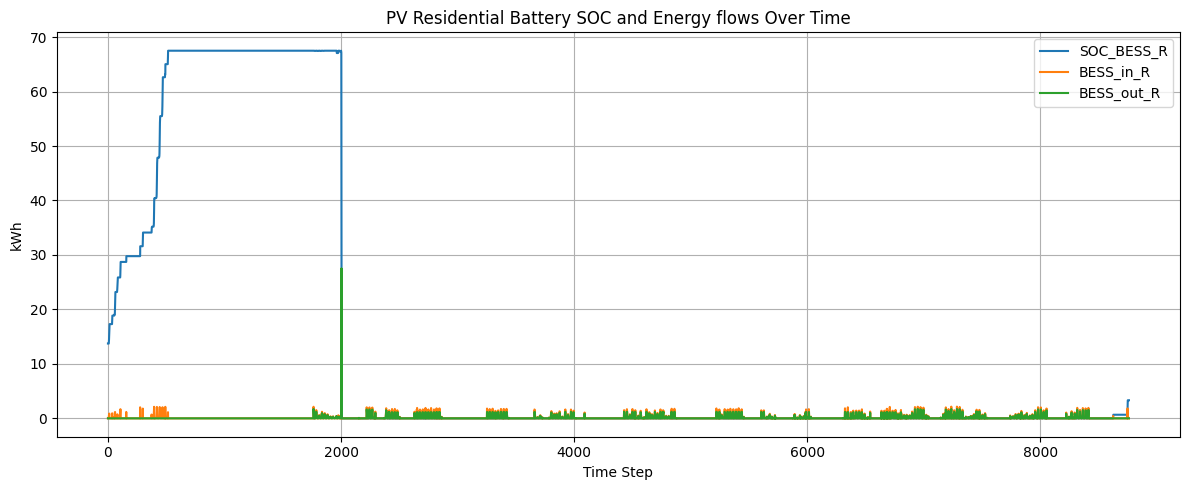

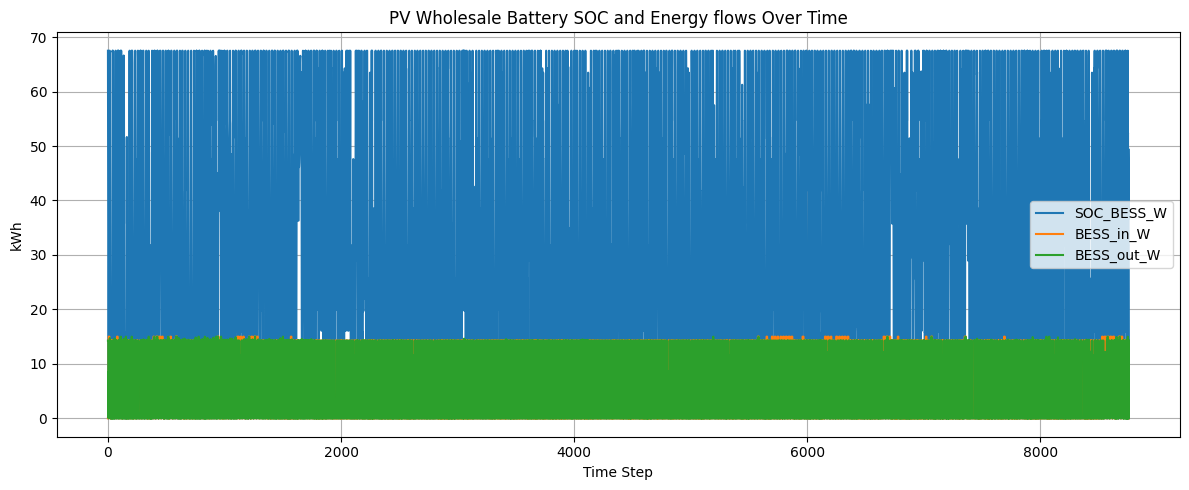

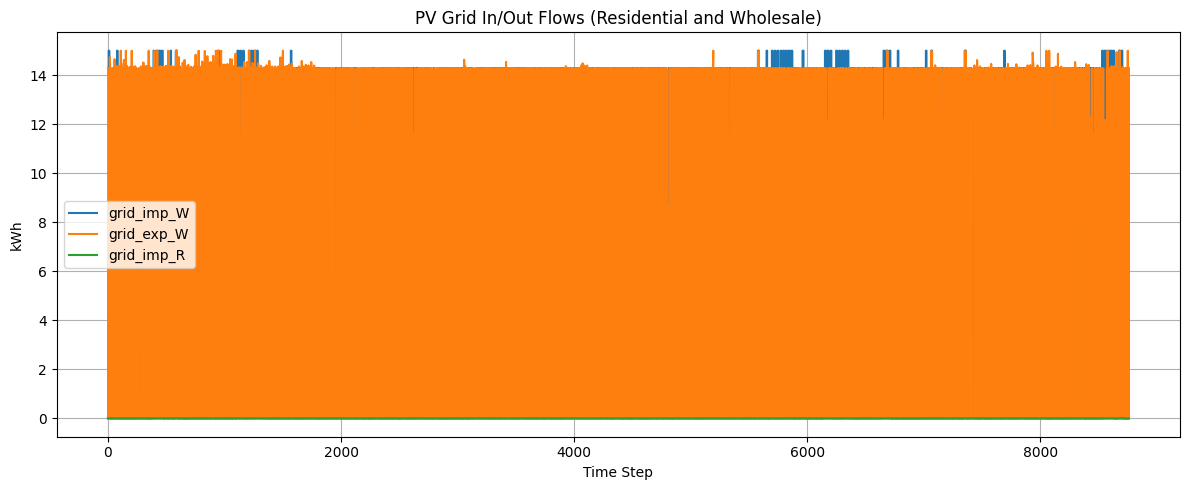

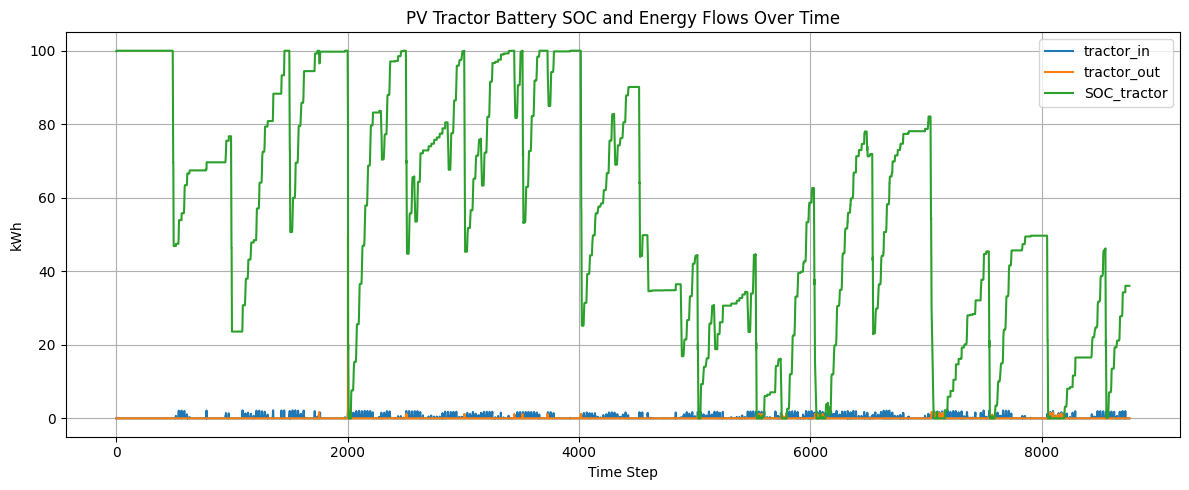

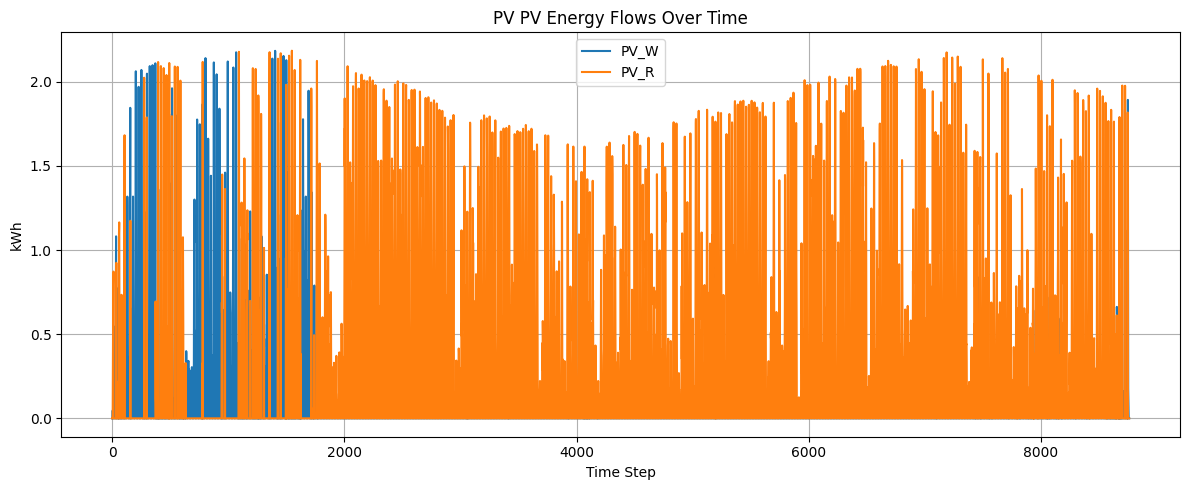

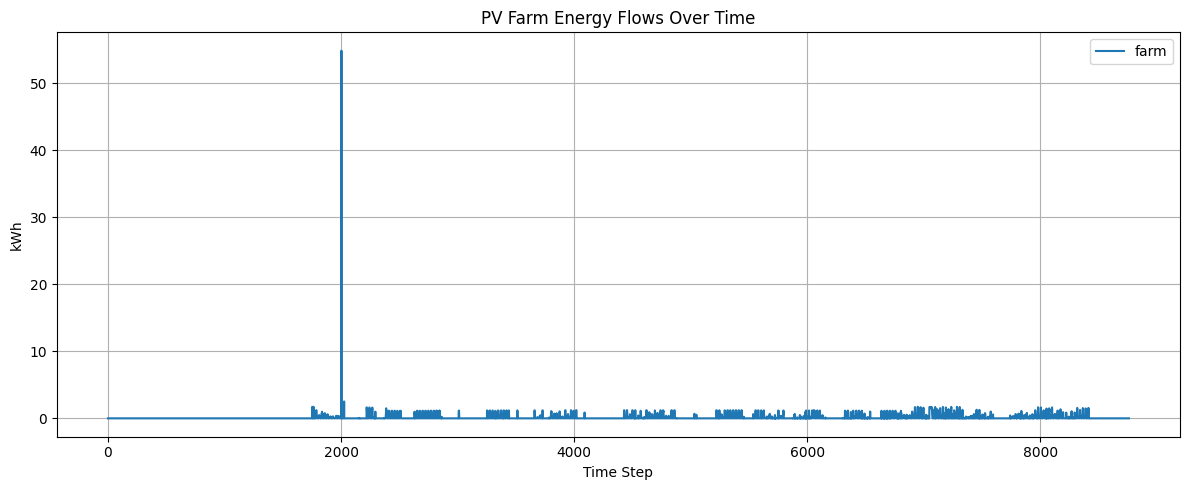

In [ ]:
from pyomo.environ import value
import matplotlib.pyplot as plt
name = 'PV and BESS R and CAPEX'
# Extract time steps (x-axis)
timesteps = list(modelv1.T)

plt.figure(figsize=(12, 5))
plt.plot(timesteps, [value(modelv1.SOC_BESS_R[t]) for t in timesteps], label='SOC_BESS_R')
plt.plot(timesteps, [value(modelv1.BESS_in_R[t]) for t in timesteps], label='BESS_in_R')
plt.plot(timesteps, [value(modelv1.BESS_out_R[t]) for t in timesteps], label='BESS_out_R')
plt.xlabel('Time Step')
plt.ylabel('kWh')
plt.title(f'{name} Residential Battery SOC and Energy flows Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(timesteps, [value(modelv1.SOC_BESS_W[t]) for t in timesteps], label='SOC_BESS_W')
plt.plot(timesteps, [value(modelv1.BESS_in_W[t]) for t in timesteps], label='BESS_in_W')
plt.plot(timesteps, [value(modelv1.BESS_out_W[t]) for t in timesteps], label='BESS_out_W')
plt.xlabel('Time Step')
plt.ylabel('kWh')
plt.title(f'{name} Wholesale Battery SOC and Energy flows Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(timesteps, [value(modelv1.grid_imp_W[t]) for t in timesteps], label='grid_imp_W')
plt.plot(timesteps, [value(modelv1.grid_exp_W[t]) for t in timesteps], label='grid_exp_W')
plt.plot(timesteps, [value(modelv1.grid_imp_R[t]) for t in timesteps], label='grid_imp_R')
plt.xlabel('Time Step')
plt.ylabel('kWh')
plt.title(f'{name} Grid In/Out Flows (Residential and Wholesale)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(timesteps, [value(modelv1.tractor_in[t]) for t in timesteps], label='tractor_in')
plt.plot(timesteps, [value(modelv1.tractor_out[t]) for t in timesteps], label='tractor_out')
plt.plot(timesteps, [value(modelv1.SOC_tractor[t]) for t in timesteps], label='SOC_tractor')
plt.xlabel('Time Step')
plt.ylabel('kWh')
plt.title(f'{name} Tractor Battery SOC and Energy Flows Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(timesteps, [value(modelv1.PV_W[t]) for t in timesteps], label='PV_W')
plt.plot(timesteps, [value(modelv1.PV_R[t]) for t in timesteps], label='PV_R')
plt.xlabel('Time Step')
plt.ylabel('kWh')
plt.title(f'{name} PV Energy Flows Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(timesteps, [value(modelv1.farm[t]) for t in timesteps], label='farm')
plt.xlabel('Time Step')
plt.ylabel('kWh')
plt.title(f'{name} Farm Energy Flows Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [ ]:
# Export to Excel File

modelv1_data = []

for v in modelv1.component_objects(Var, active=True):
    var_name = v.name
    for index in v:
        var_value = value(v[index])
        modelv1_data.append({
            'Variable': var_name,
            'Index': index if isinstance(index, tuple) else (index,),
            'Value': var_value
        })

df = pd.DataFrame(modelv1_data)

output_path = f'{name}.xlsx'
df.to_excel(output_path, index=False)
print(f"Decision variables saved to {output_path}")